# Project #8 - Predicting Bike Rentals
### Washington DC 2011 Data

Let's dive into this project utilizing decision trees.

As always, what is in this data set?


In [2]:
import pandas as pd

path = '/Users/nstanzione/Documents/EDU/DataQuest/Data/'
file = 'bike_rental_hour.csv'
data = pd.read_csv(path+file)

data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


array([[<AxesSubplot:title={'center':'cnt'}>]], dtype=object)

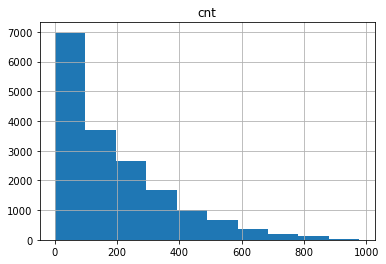

In [4]:
data.hist(column='cnt')

In [6]:
data.corrwith(data['cnt'])

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
dtype: float64

The 'hr' column is a 0-24 indicator of the hour of the day. Let's group this into 4 buckets to represent different times of day to better reflect the value of the hr column.

In [12]:
def assign_label(val):
    if val <= 6:
        return 4
    elif val <= 12:
        return 1
    elif val <= 18:
        return 2
    else:
        return 3

data['time_label'] = data['hr'].apply(lambda x: assign_label(x))
print(data[['hr','time_label']].head())
print(data[['hr','time_label']].tail())

   hr  time_label
0   0           4
1   1           4
2   2           4
3   3           4
4   4           4
       hr  time_label
17374  19           3
17375  20           3
17376  21           3
17377  22           3
17378  23           3


Now we are ready to do some analysis! Going to use mean squared error as the error term for this exercise cause its the best and we all know it. #StatsGuru

In [24]:
train = data.sample(frac=0.8, random_state=1)
test = data.loc[~data.index.isin(train.index)]

features = list(train.columns)
features.remove("cnt")
features.remove("casual")
features.remove("registered")
features.remove("dteday")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

lr = LinearRegression()
lr.fit(train[features],train['cnt'])
predictions = lr.predict(test[features])

test['predictions'] = predictions
error = mse(test['cnt'],predictions)
print(test[['cnt','predictions']])
print(error)

       cnt  predictions
0       16   -98.336653
14     106   144.194509
15     110   139.270136
18      35   119.112868
20      36    85.265693
...    ...          ...
17350  102   167.445749
17361   40   -10.118126
17366  157   198.907381
17371  214   190.273944
17377   61   173.945166

[3476 rows x 2 columns]
15848.500195099272


<ipython-input-24-80bbce491d71>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


Well that was not helpful, a mean squared error > 15,000!!! 

TO THE DECISION TREE...

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(train[features],train['cnt'])
tree_predictions = tree.predict(test[features])

tree_error = mse(tree_predictions,test["cnt"])
print(tree_error)


3222.8578826237053


Ah... much better... but wait, there is more!!!
For $500, a term for a large collection of trees.
What is a FOREST? (I know a bit random... I'll be here all week)
But let's see if we can do even better than the prior estimate. WAKE! ....



In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(train[features],train['cnt'])
forest_predictions = forest.predict(test[features])

forest_error = mse(forest_predictions,test["cnt"])
print(forest_error)

1839.2261707134637
